In [265]:
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime
import numpy as np
import pandas as pd
from statsmodels.tsa import arima_process
import matplotlib.pyplot as plt

from statsmodels.datasets import nile
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt


import statsmodels.api as sm
from statsmodels.tsa.filters.filtertools import convolution_filter
import statsmodels.graphics.tsaplots as tsplots
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.tsa.forecasting.stl import STLForecast
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Importing libraries
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 
# Above is a special style template for matplotlib, highly useful for visualizing time series data
%matplotlib inline
from pylab import rcParams
from plotly import tools

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
import math
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA

# include the Seasonal Arima Model for forecasting, SARIMAX
from statsmodels.tsa.statespace.sarimax import SARIMAX 


In [150]:
gold = pd.read_csv('gold_price_data.csv')
msft = pd.read_csv('Microsoft_Stock.csv')
gold.head()

,Date,Value
0,1970-01-01,35.2
1,1970-04-01,35.1
2,1970-07-01,35.4
3,1970-10-01,36.2
4,1971-01-01,37.4


In [152]:
gold2 = pd.read_csv('gold_price_data.csv', index_col = 'Date', parse_dates =['Date'])
gold2.head()

,Value
Date,
1970-01-01,35.2
1970-04-01,35.1
1970-07-01,35.4
1970-10-01,36.2
1971-01-01,37.4


In [153]:
gold2 = gold2.iloc[1:]
gold2 = gold2.fillna(method = 'ffill')
gold2.head()

,Value
Date,
1970-04-01,35.1
1970-07-01,35.4
1970-10-01,36.2
1971-01-01,37.4
1971-04-01,38.9


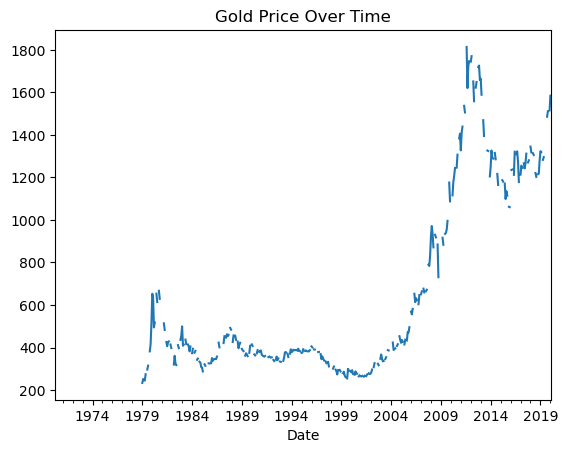

In [157]:
# asfreq method is used to convert a time series to a specified frequency. Here it is monthly frequency.
gold2['Value'].asfreq('M').plot()
plt.title('Gold Price Over Time')
plt.show()

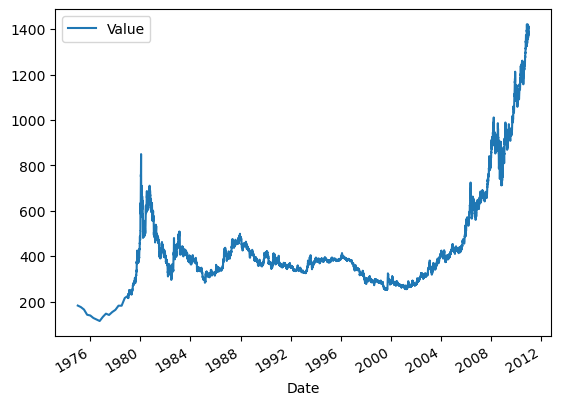

In [159]:
gold2['1975': '2010'].plot()

plt.savefig('gold_price.png')

In [160]:
# Creating a Timestamp
timestamp = pd.Timestamp(2017, 1, 1, 12)
timestamp

Timestamp('2017-01-01 12:00:00')

In [161]:
# Creating a period
period = pd.Period('2017-01-01')
period

Period('2017-01-01', 'D')

In [162]:
# Checking if the given timestamp exists in the given period
period.start_time < timestamp < period.end_time

True

In [163]:
# Converting timestamp to period
new_period = timestamp.to_period(freq='H')
new_period

Period('2017-01-01 12:00', 'H')

In [164]:
# Converting period to timestamp
new_timestamp = period.to_timestamp(freq='H', how='start')
new_timestamp

Timestamp('2017-01-01 00:00:00')

In [165]:
# Creating a datetimeindex with daily frequency
dr1 = pd.date_range(start='1/1/18', end='1/9/18')
dr1

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09'],
              dtype='datetime64[ns]', freq='D')

In [167]:
# Creating a datetimeindex with monthly frequency
dr2 = pd.date_range(start='1/1/1980', end='1/1/2015', freq='M')
dr2

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '2014-03-31', '2014-04-30', '2014-05-31', '2014-06-30',
               '2014-07-31', '2014-08-31', '2014-09-30', '2014-10-31',
               '2014-11-30', '2014-12-31'],
              dtype='datetime64[ns]', length=420, freq='M')

In [168]:
# Creating a datetimeindex without specifying start date and using periods
dr3 = pd.date_range(end='1/4/2014', periods=8)
dr3

DatetimeIndex(['2013-12-28', '2013-12-29', '2013-12-30', '2013-12-31',
               '2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04'],
              dtype='datetime64[ns]', freq='D')

In [169]:
# Creating a datetimeindex specifying start date , end date and periods
dr4 = pd.date_range(start='1980', end='2015', periods=140)
dr4

DatetimeIndex([          '1980-01-01 00:00:00',
               '1980-04-01 23:18:33.669064748',
               '1980-07-02 22:37:07.338129496',
               '1980-10-02 21:55:41.007194244',
               '1981-01-02 21:14:14.676258992',
               '1981-04-04 20:32:48.345323744',
               '1981-07-05 19:51:22.014388488',
               '1981-10-05 19:09:55.683453232',
               '1982-01-05 18:28:29.352517984',
               '1982-04-07 17:47:03.021582736',
               ...
               '2012-09-25 06:12:56.978417280',
               '2012-12-26 05:31:30.647481984',
               '2013-03-28 04:50:04.316546688',
               '2013-06-28 04:08:37.985611520',
               '2013-09-28 03:27:11.654676224',
               '2013-12-29 02:45:45.323740928',
               '2014-03-31 02:04:18.992805760',
               '2014-07-01 01:22:52.661870464',
               '2014-10-01 00:41:26.330935168',
                         '2015-01-01 00:00:00'],
              dtype=

## Resampling
Upsampling - Time series is resampled from low frequency to high frequency(Monthly to daily frequency). It involves filling or interpolating missing data

Downsampling - Time series is resampled from high frequency to low frequency(Weekly to monthly frequency). It involves aggregation of existing data.

In [186]:
gold2.shape

(10786, 2)

In [198]:
#downsampling to less observations
gold3 = gold2.resample('M').ffill()
gold3.head()
gold3.shape
gold3.head()

,Value,Change
Date,,
1970-04-30,35.1,NaN
1970-05-31,35.1,NaN
1970-06-30,35.1,NaN
1970-07-31,35.4,1.008547
1970-08-31,35.4,1.008547


In [188]:
#upsampling to more observations
gold4 = gold2.resample('D').ffill()
gold4.head(100)
gold4.shape

(18245, 2)

## Finance and Stats

<AxesSubplot:xlabel='Date'>

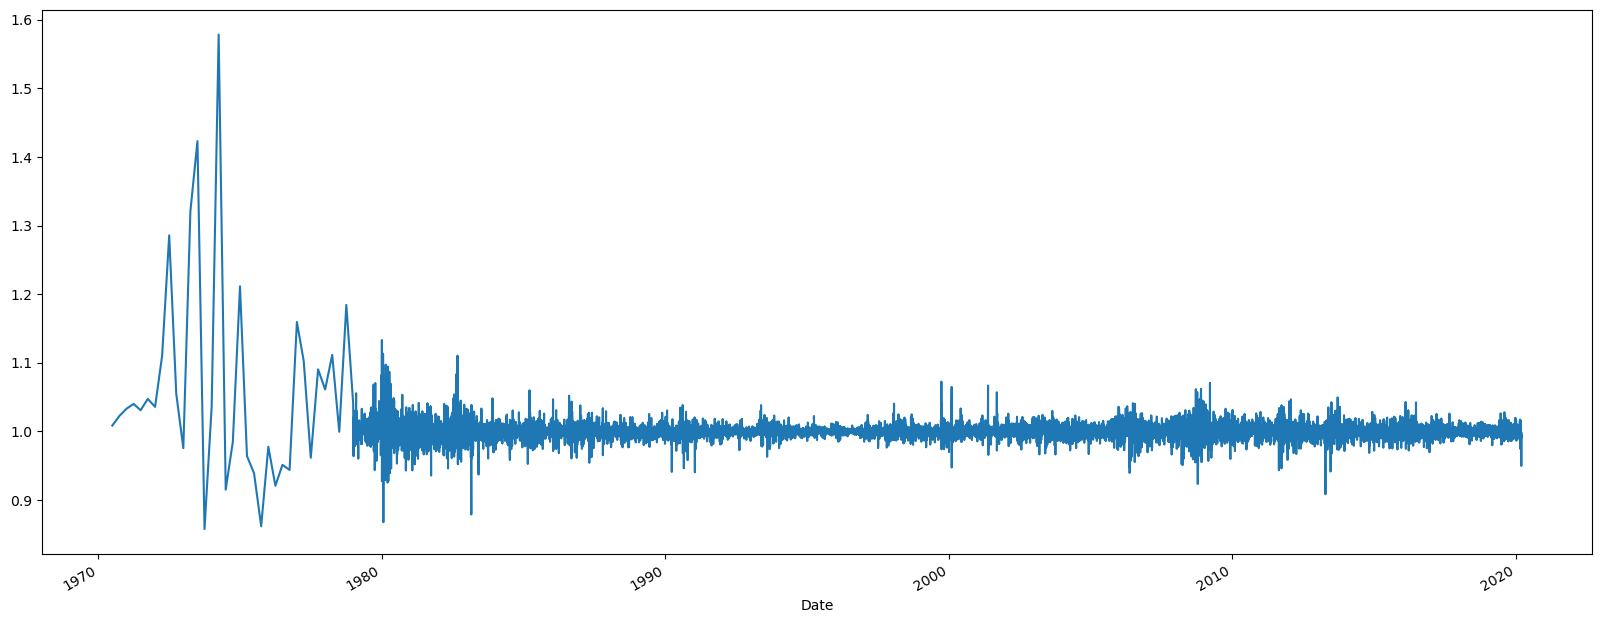

In [189]:
# Percent Change
gold2['Change'] = gold2.Value.div(gold2.Value.shift())
gold2['Change'].plot(figsize=(20,8))

### window functions
2.5 Window functions
Window functions are used to identify sub periods, calculates sub-metrics of sub-periods.

Rolling - Same size and sliding

Expanding - Contains all prior values

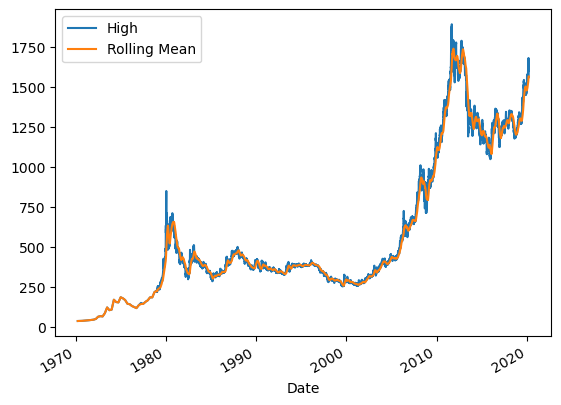

In [190]:
# Rolling window functions
rolling_gold = gold2.Value.rolling('90D').mean()
gold2.Value.plot()
rolling_gold.plot()
plt.legend(['High','Rolling Mean'])
# Plotting a rolling mean of 90 day window with original High attribute of google stocks
plt.show()

## 2.8 Autocorrelation and Partial Autocorrelation
Autocorrelation - The autocorrelation function (ACF) measures how a series is correlated with itself at different lags.
Partial Autocorrelation - The partial autocorrelation function can be interpreted as a regression of the series against its past lags. The terms can be interpreted the same way as a standard linear regression, that is the contribution of a change in that particular lag while holding others constant.

In [199]:
gold3.head()

,Value,Change
Date,,
1970-04-30,35.1,NaN
1970-05-31,35.1,NaN
1970-06-30,35.1,NaN
1970-07-31,35.4,1.008547
1970-08-31,35.4,1.008547


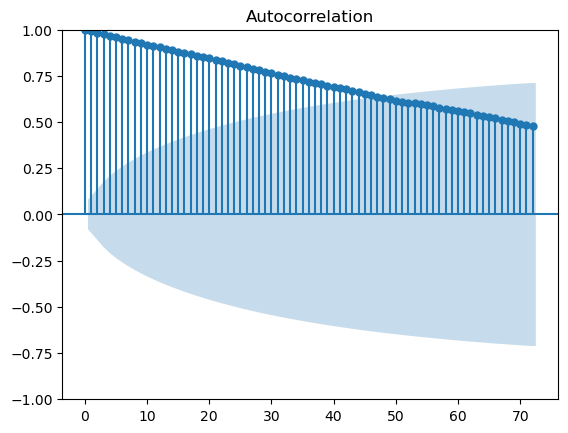

In [206]:
# remains above unil 45 lags or so
plot_acf(gold3['Value'], lags = 72)
plt.show()

/Users/leostern/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


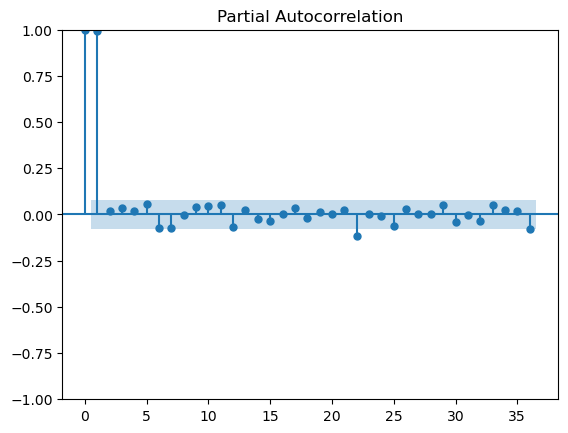

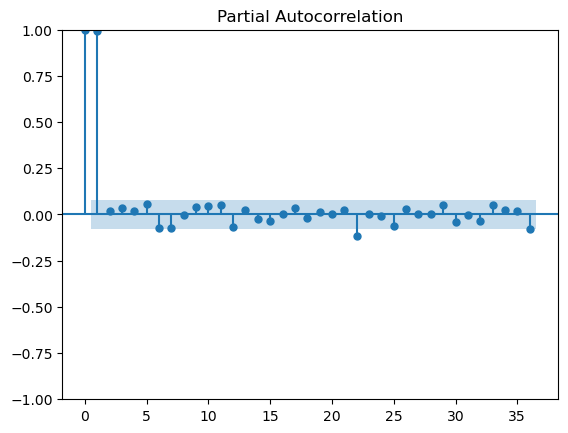

In [207]:
# partial acf after 2 lags is very low...except for 22 and 36
plot_pacf(gold3['Value'], lags = 36)

## 3.1. Trends, seasonality and noise
These are the components of a time series

Trend - Consistent upwards or downwards slope of a time series
Seasonality - Clear periodic pattern of a time series(like sine funtion)
Noise - Outliers or missing values

Text(0.5, 1.0, 'Gold Price over Time')

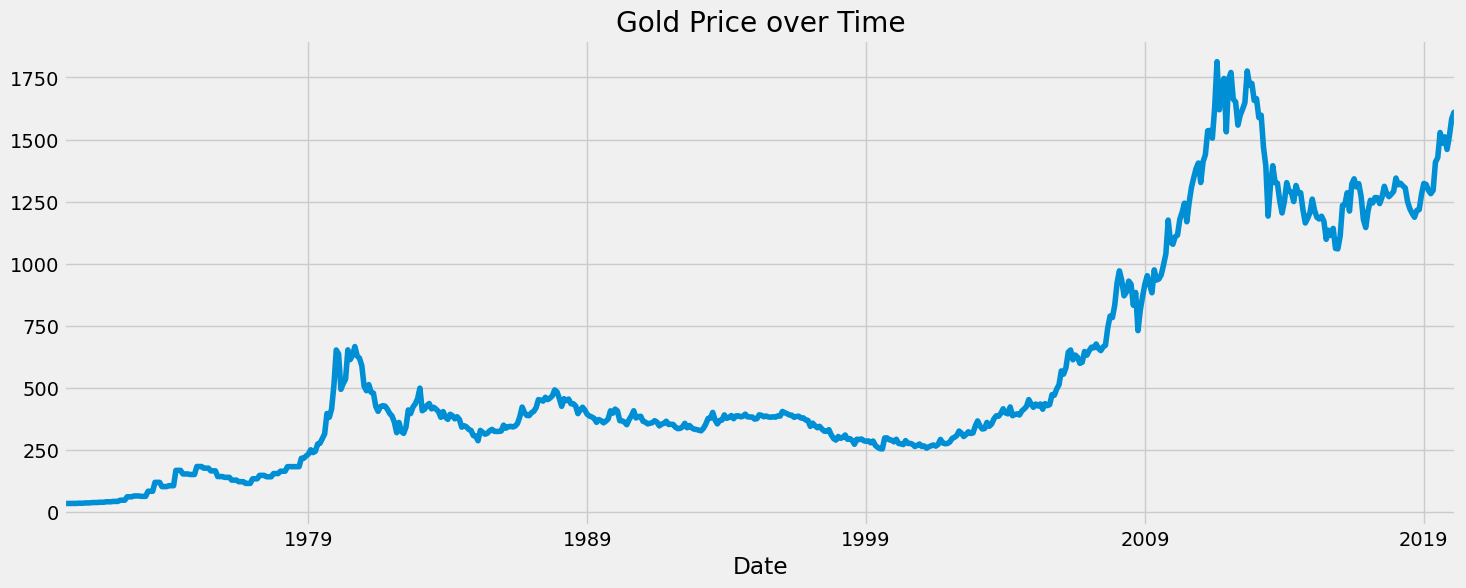

In [293]:
gold3['Value'].plot()
plt.title('Gold Price over Time')

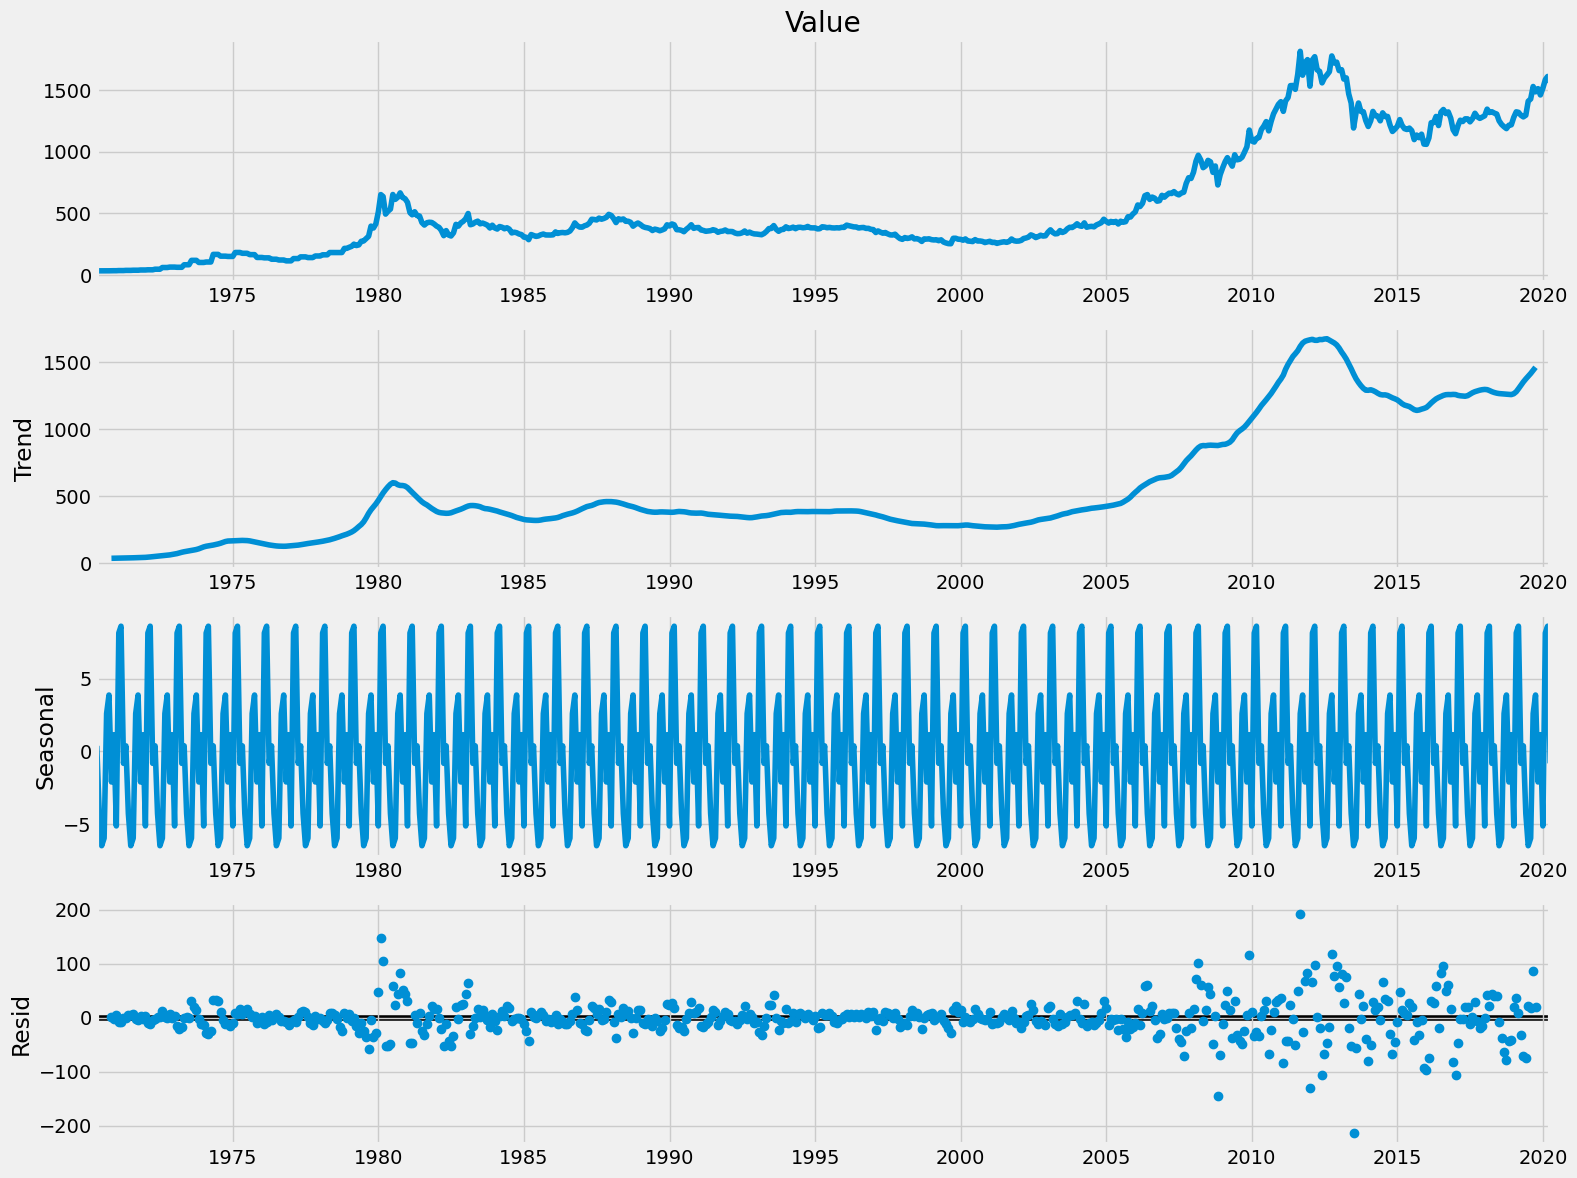

In [223]:
rcParams['figure.figsize'] =16, 12
decomposed_gold_price = sm.tsa.seasonal_decompose(gold3['Value'], period = 12)  #frequency is monthly
figure = decomposed_gold_price.plot()

More or less upward trend. Seasonal change is fairly uniform. Non uniform residuals represents outliers.

## White Noise
Constant mean, 
Constant variance, 
Zero auto-correlation at all lags

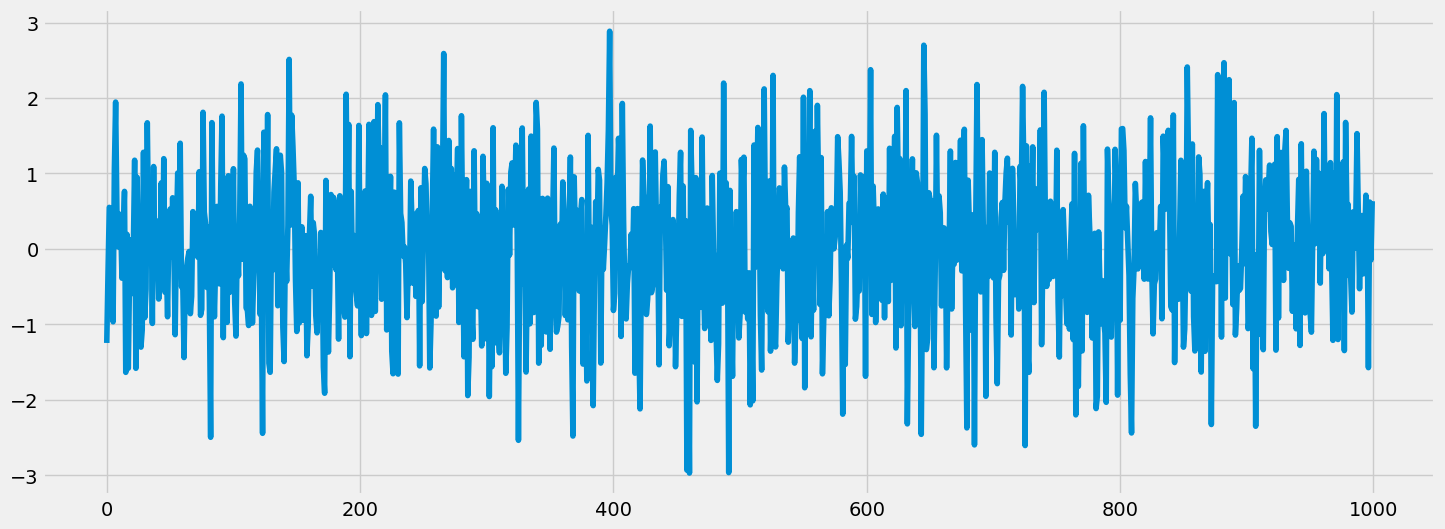

In [225]:
# Plotting white noise
rcParams['figure.figsize'] = 16, 6
white_noise = np.random.normal(loc=0, scale=1, size=1000)
# loc is mean, scale is variance
plt.plot(white_noise)

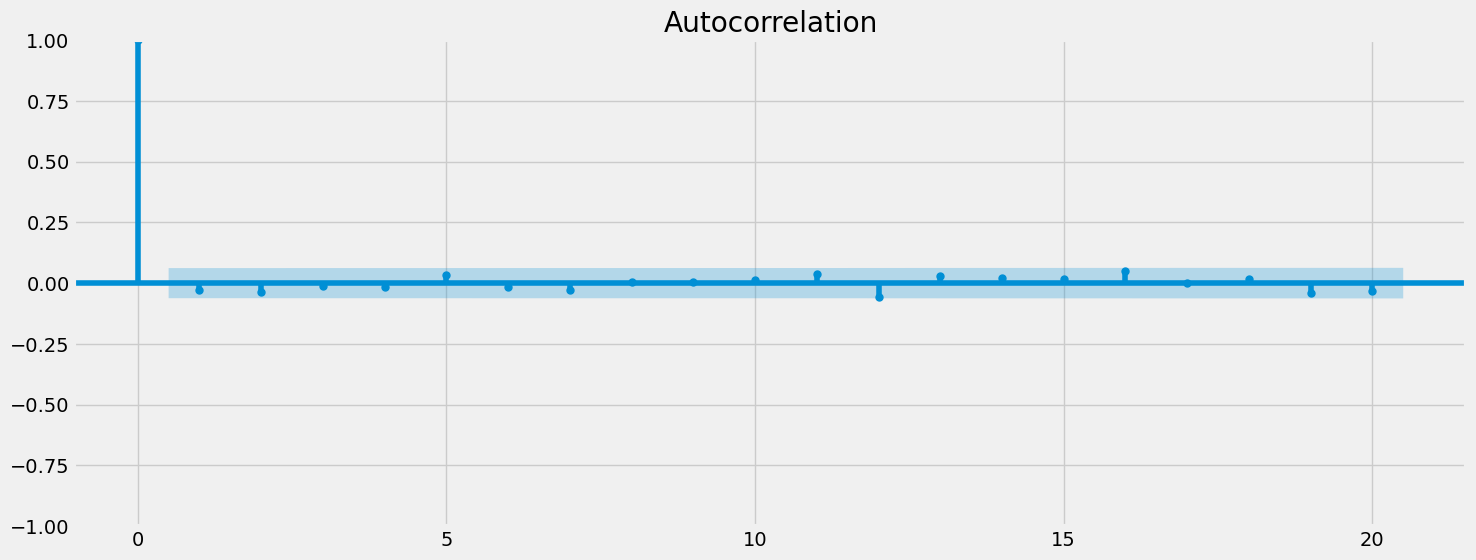

In [226]:
# Plotting autocorrelation of white noise
plot_acf(white_noise,lags=20)
plt.show()

See how all lags are statistically insigficant as they lie inside the confidence interval(shaded portion).

## Augmented Dickey-Fuller test
An augmented Dickey–Fuller test (ADF) tests the null hypothesis that a unit root is present in a time series sample. It is basically Dickey-Fuller test with more lagged changes on RHS

In [228]:
adf = adfuller(gold3['Value'])
print("p-value of gold: {}".format(float(adf[1])))

p-value of gold: 0.927359661491178


gold pvalue is more than .05...therefore null hypothesis is not rejected...therefore it is not stationary

## Stationarity

A stationary time series is one whose statistical properties such as mean, variance, autocorrelation, etc. are all constant over time.

Strong stationarity: is a stochastic process whose unconditional joint probability distribution does not change when shifted in time. Consequently, parameters such as mean and variance also do not change over time.
Weak stationarity: is a process where mean, variance, autocorrelation are constant throughout the time
Stationarity is important as non-stationary series that depend on time have too many parameters to account for when modelling the time series. diff() method can easily convert a non-stationary series to a stationary series.

We will try to decompose seasonal component of the above decomposed time series.

<AxesSubplot:xlabel='Date'>

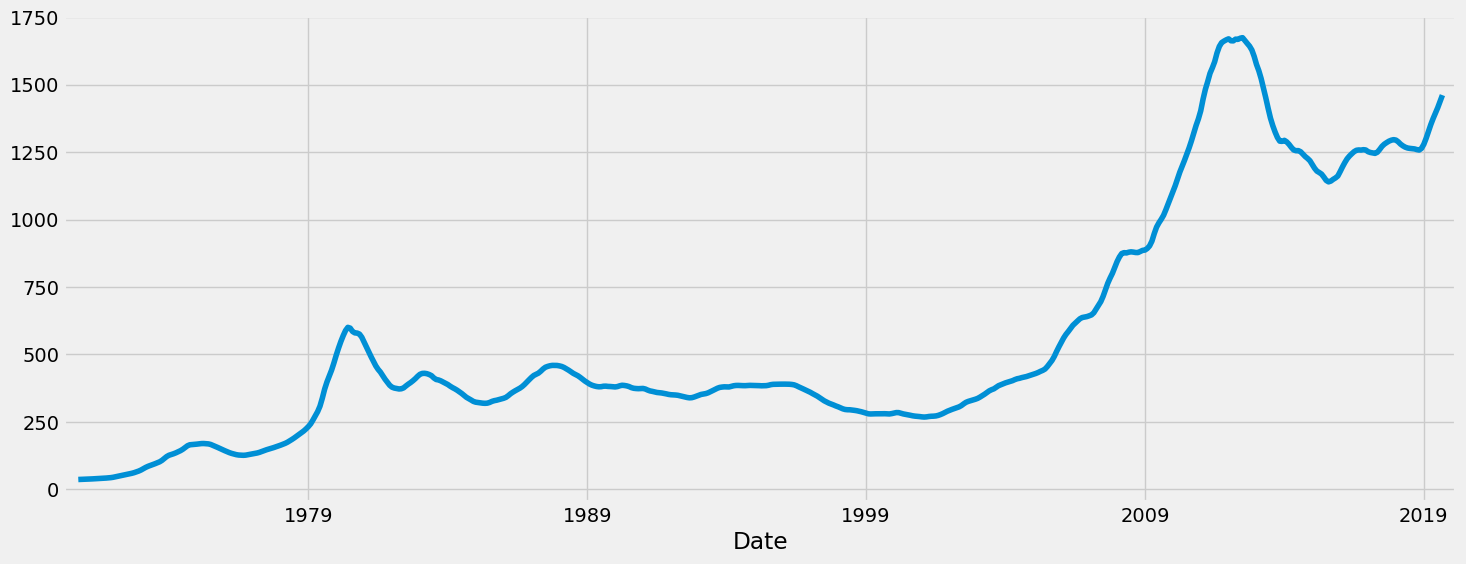

In [230]:
# The original non-stationary plot
decomposed_gold_price.trend.plot()

<AxesSubplot:xlabel='Date'>

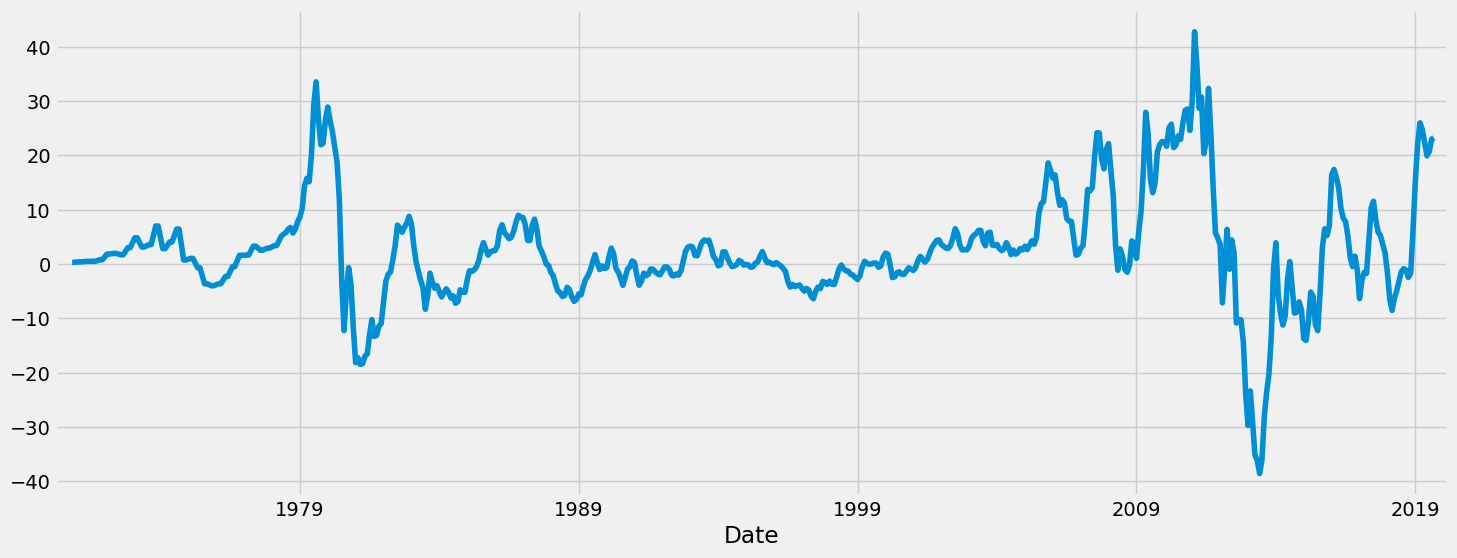

In [231]:
# The new stationary plot
decomposed_gold_price.trend.diff().plot()

In [261]:
from statsmodels.graphics.tsaplots import plot_predict
# predicting gold using ARIMA
price = ARIMA(gold3['Value'].diff().iloc[1:].values, order = (1,0,0)).fit()
print(price.summary())
# plot_predict(price, start = 700, end = 1000)

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  599
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -3023.249
Date:                Fri, 18 Nov 2022   AIC                           6052.499
Time:                        13:46:35   BIC                           6065.685
Sample:                             0   HQIC                          6057.632
                                - 599                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5504      1.395      1.829      0.067      -0.183       5.284
ar.L1         -0.1073      0.019     -5.755      0.000      -0.144      -0.071
sigma2      1419.5315     36.748     38.629      0.0

## ## Create a forcasting time series plot using a Seasonal ARIMA model


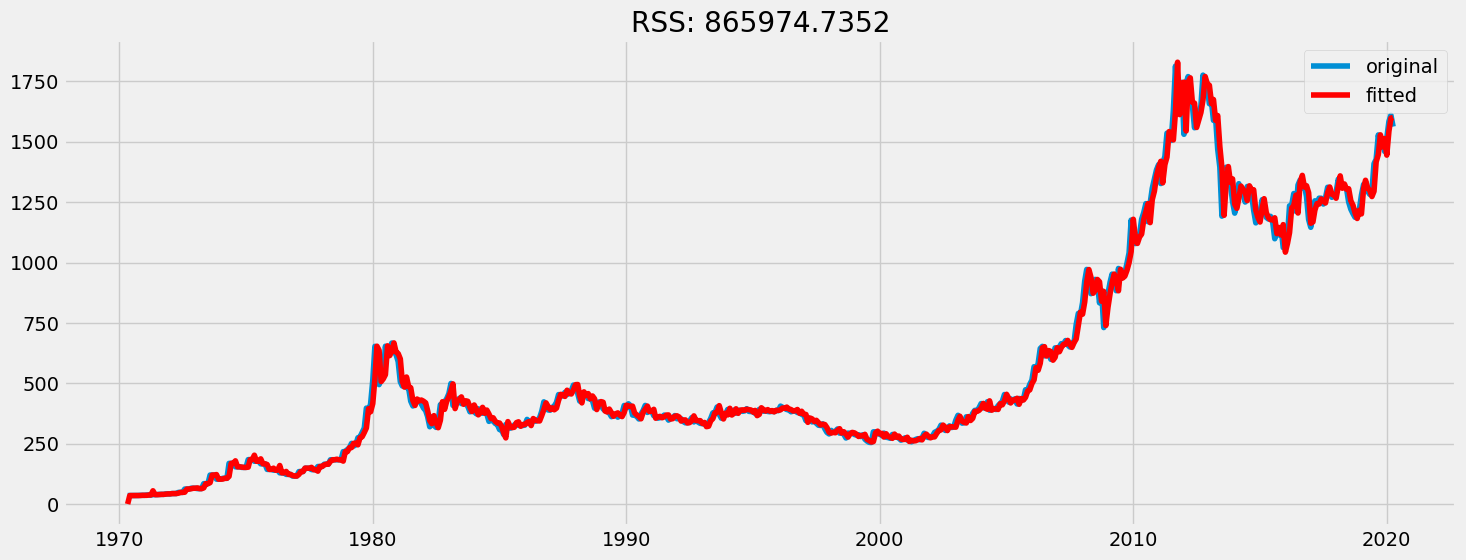

In [268]:
model = SARIMAX(gold3['Value'], trend='n', order=(0,1,0), seasonal_order=(1,1,1,12))
results_ARIMA = model.fit(disp=-1) 
plt.plot(gold3['Value'], label='original')
plt.plot(results_ARIMA.fittedvalues, color='red', label='fitted')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-gold3['Value'])**2))
plt.legend()

In [269]:
#convert our data series back into a dataframe
df = pd.DataFrame(gold3['Value'])
# Add a forecast column to the dataframe that includes our predictions from the model
df['forecast'] = results_ARIMA.predict(start = '1957-05-01', end= '1960-12-01', dynamic= True)
# Plot the Dataframe data 
df[['value', 'forecast']].plot(figsize=(12, 8))
# Add a title
plt.title('Arima model forecast of #passengers compared to actual')
# Show the plot
plt.show()

In [271]:
gold3.head()

,Value,Change
Date,,
1970-04-30,35.1,NaN
1970-05-31,35.1,NaN
1970-06-30,35.1,NaN
1970-07-31,35.4,1.008547
1970-08-31,35.4,1.008547


In [282]:
y_hist = gold3.loc['1975':'2010', 'Value']
y_future = gold3.loc['2011': '2015', 'Value']
# gold3.drop(columns = 'Change', inplace = True)
gold3

,Value
Date,
1970-04-30,35.10
1970-05-31,35.10
1970-06-30,35.10
1970-07-31,35.40
1970-08-31,35.40
...,...
2019-11-30,1460.15
2019-12-31,1514.75
2020-01-31,1584.20


In [290]:
# Add a forecast column to the dataframe that includes our predictions from the model
gold3['forecast'] = results_ARIMA.predict(start = '2011', end= '2020', dynamic= True)
gold3.head()
gold_forecast = gold3.loc['2011': '2020']
gold_forecast.head()

,Value,forecast
Date,,
2011-01-31,1327.0,1419.164560
2011-02-28,1411.0,1422.064969
2011-03-31,1439.0,1416.350289
2011-04-30,1535.5,1414.001360
2011-05-31,1536.5,1420.752019


<AxesSubplot:xlabel='Date'>

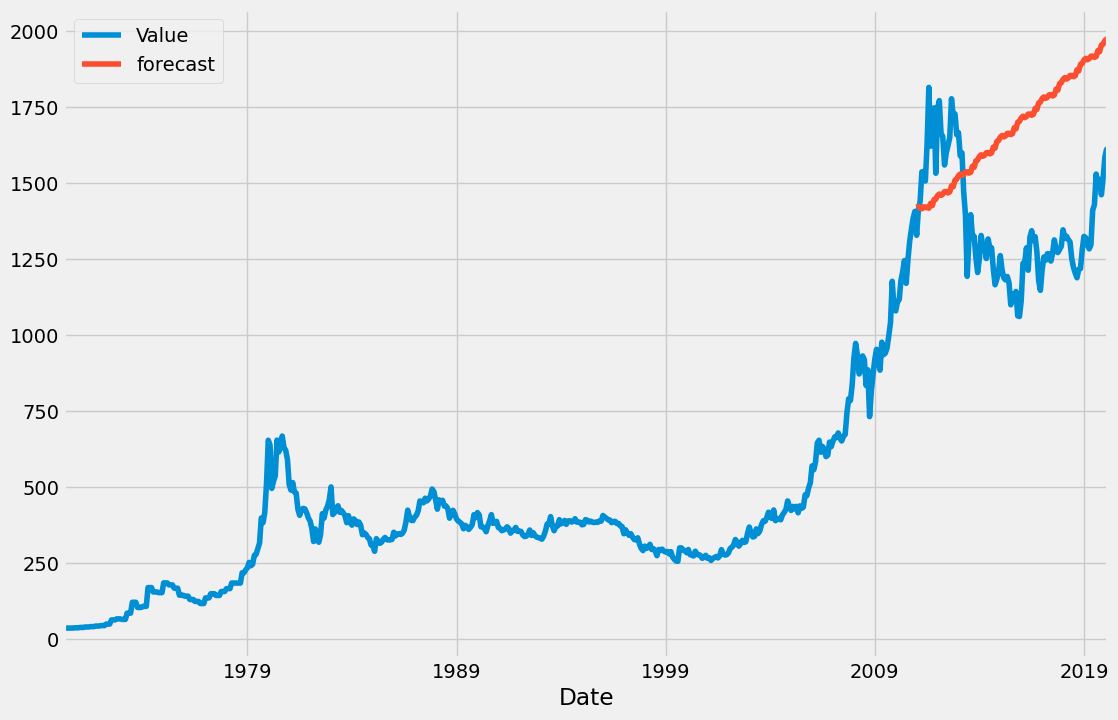

In [291]:
# Plot the Dataframe data 
gold3[['Value', 'forecast']].plot(figsize=(12, 8))

In [100]:
msft.head()

,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438


In [101]:
msft = msft[['Date', 'Open']]
msft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1511 non-null   object 
 1   Open    1511 non-null   float64
dtypes: float64(1), object(1)
memory usage: 23.7+ KB


In [102]:
msft = msft.set_index(pd.to_datetime(msft['Date'], format = '%m/%d/%Y %H:%M:%S')).drop(columns = ['Date'])
msft.head()
msft.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1511 entries, 2015-04-01 16:00:00 to 2021-03-31 16:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1511 non-null   float64
dtypes: float64(1)
memory usage: 23.6 KB


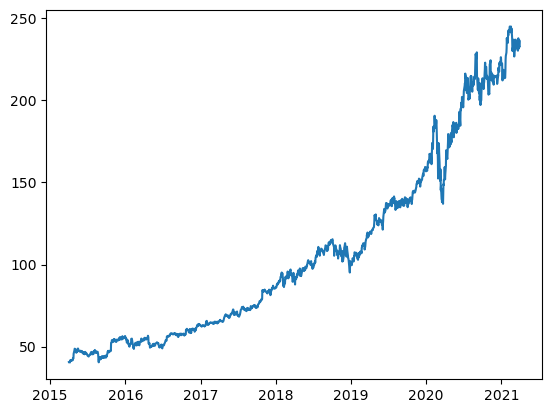

In [103]:
plt.plot(msft)

In [104]:
y_hist = msft.loc['2015':'2018', 'Open']
y_future = msft.loc['2019', 'Open']

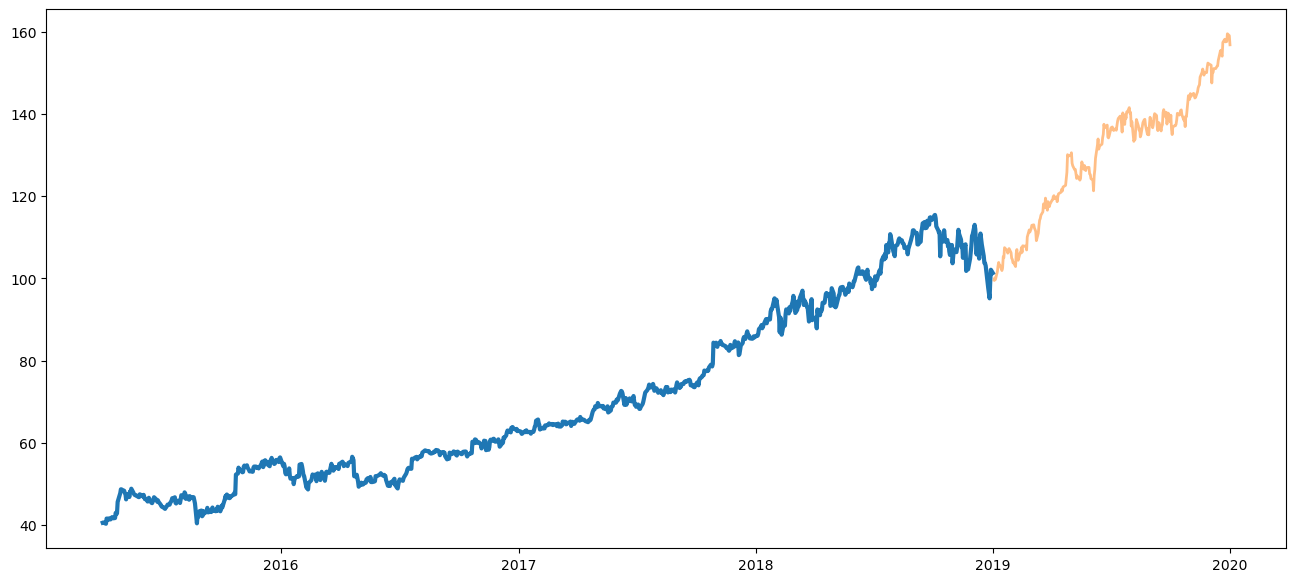

In [105]:
plt.figure(figsize = (16,7))
plt.plot(y_hist, linewidth = 3)
plt.plot(y_future, alpha = 0.5, linewidth = 2)


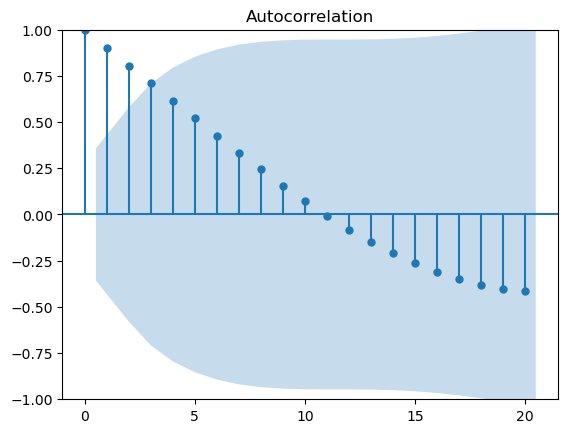

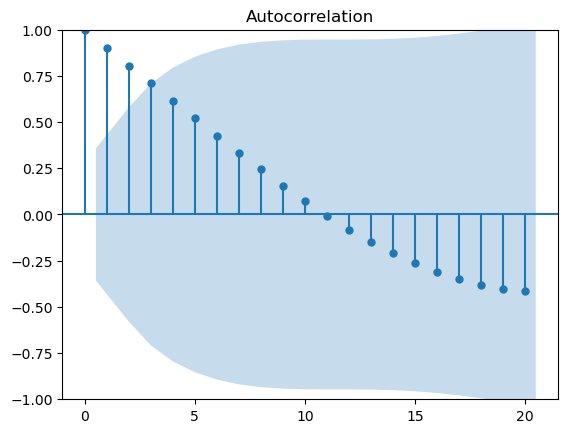

In [106]:
process = arima_process.ArmaProcess(ar = [.9, -.3], ma = [1])
auto_corr = acf(y_hist, fft = True)
plot_acf(auto_corr, lags = 20)

In [107]:
# above .05...thus can't reject, thus it's non-stationary
hyp = adfuller(y_hist)
hyp

(-0.34554673921263906,
 0.9188012504550439,
 9,
 935,
 {'1%': -3.437363201927513,
  '5%': -2.864636122077874,
  '10%': -2.5684185607252137},
 2776.673149499153)

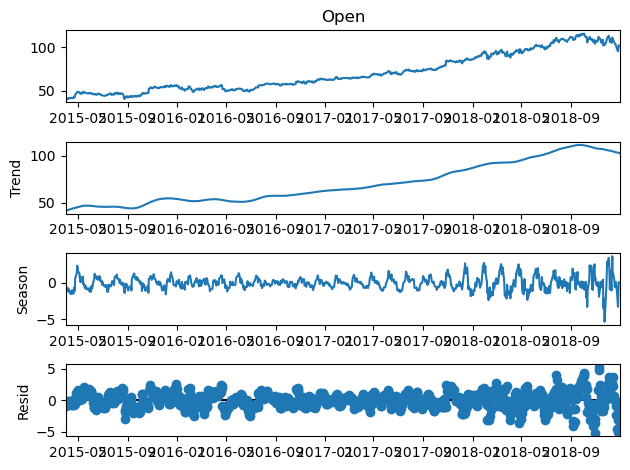

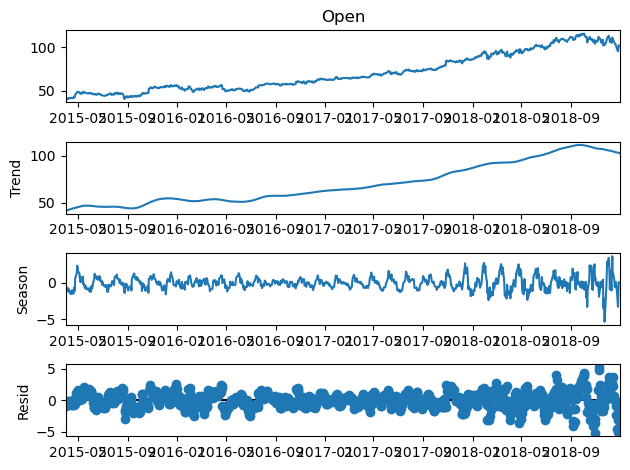

In [108]:
stl = STL(y_hist, period = 30)
results = stl.fit()
results.plot()

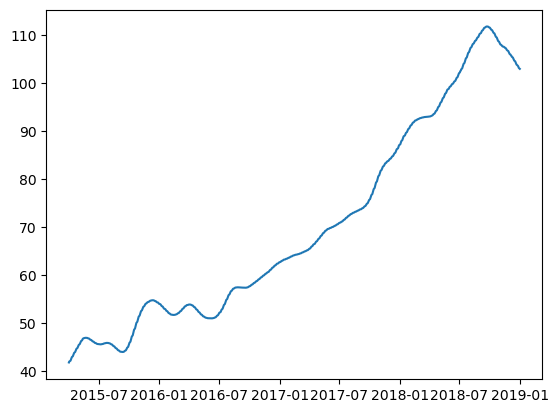

In [109]:
#up trend
plt.plot(results.trend)

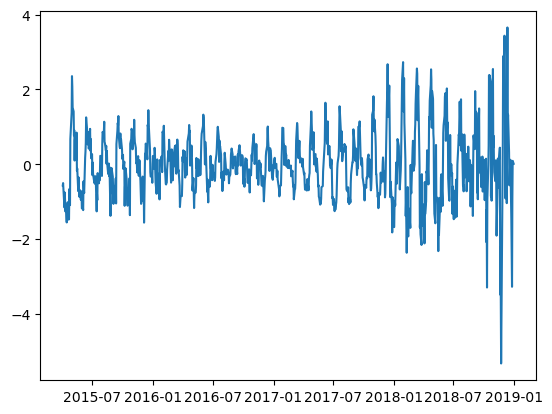

In [110]:
#stationary seasons
plt.plot(results.seasonal)

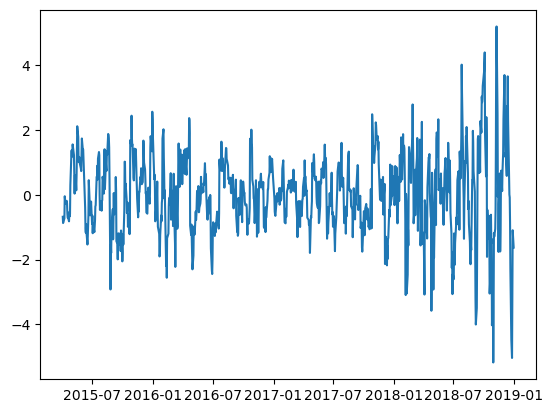

In [111]:
#stationary residuals
plt.plot(results.resid)

In [112]:
trend_and_season = results.trend + results.seasonal

(array([16617., 16801., 16983., 17167., 17348., 17532., 17713., 17897.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

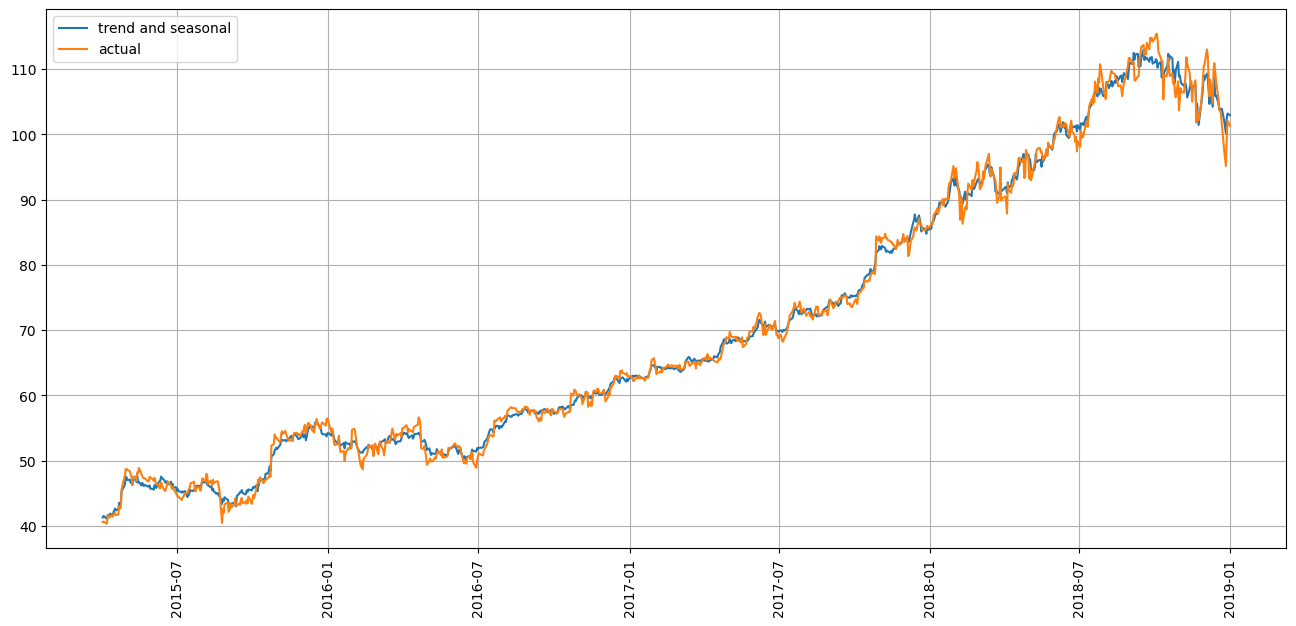

In [113]:
plt.figure(figsize = (16,7))
plt.plot(trend_and_season, label = 'trend and seasonal')
plt.plot(y_hist, label = 'actual')
plt.grid()
plt.legend()
plt.xticks(rotation = 90)

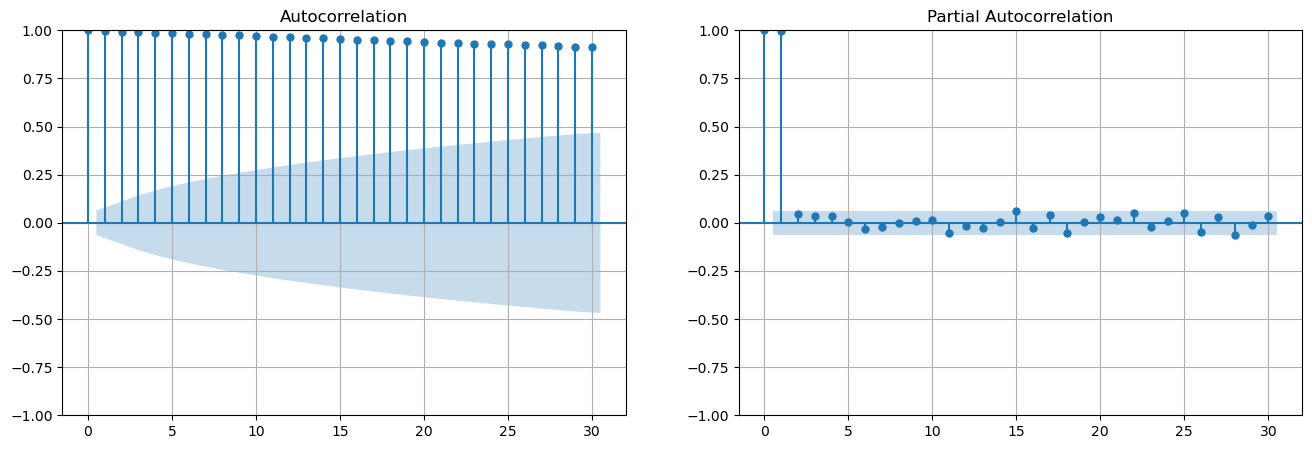

In [114]:
#PACF suggests using a value of p = 1
fig, ax = plt.subplots(1, 2, figsize = (16, 5))
plot_acf(y_hist, ax = ax[0]);
ax[0].grid()
plot_pacf(y_hist, ax = ax[1], method = 'ywm');
ax[1].grid()

In [118]:
)

/Users/leostern/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/leostern/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/leostern/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [123]:
y_hist_df = y_hist.to_frame()
y_hist_df

,Open
Date,
2015-04-01 16:00:00,40.60
2015-04-02 16:00:00,40.66
2015-04-06 16:00:00,40.34
2015-04-07 16:00:00,41.61
2015-04-08 16:00:00,41.48
...,...
2018-12-24 13:00:00,97.68
2018-12-26 16:00:00,95.14
2018-12-27 16:00:00,99.30


In [125]:
arma = ARIMA(y_hist_df['Open'], order = (1,0,1)).fit()

/Users/leostern/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/leostern/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/leostern/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [129]:
hist_preds = arma.predict()
print(hist_preds.tail())

Date
2015-04-01 16:00:00    70.328913
2015-04-02 16:00:00    40.636872
2015-04-06 16:00:00    40.683014
2015-04-07 16:00:00    40.416513
2015-04-08 16:00:00    41.461711
Name: predicted_mean, dtype: float64


In [130]:
future_preds = arma.forecast(steps = len(y_future))

/Users/leostern/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [132]:
print(future_preds.tail())
print(y_future.tail())

1192    95.208027
1193    95.185964
1194    95.163920
1195    95.141895
1196    95.119890
Name: predicted_mean, dtype: float64
Date
2019-12-24 13:00:00    157.48
2019-12-26 16:00:00    157.56
2019-12-27 16:00:00    159.45
2019-12-30 16:00:00    158.99
2019-12-31 16:00:00    156.77
Name: Open, dtype: float64


In [133]:
gold.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10787 entries, 1970-01-01 to 2020-03-13
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   10787 non-null  float64
dtypes: float64(1)
memory usage: 168.5 KB


In [134]:
gold

,Value
Date,
1970-01-01,35.20
1970-04-01,35.10
1970-07-01,35.40
1970-10-01,36.20
1971-01-01,37.40
...,...
2020-03-09,1672.50
2020-03-10,1655.70
2020-03-11,1653.75


In [142]:
y_hist = gold.loc['1980':'2015', 'Value']
y_future = msft.loc['2016': '2019', 'Open']

In [143]:
y_hist.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 9393 entries, 1980-01-01 to 2015-12-31
Series name: Value
Non-Null Count  Dtype  
--------------  -----  
9393 non-null   float64
dtypes: float64(1)
memory usage: 146.8 KB


In [144]:
y_hist_df = y_hist.to_frame()
y_future_df = y_future.to_frame()

<AxesSubplot:xlabel='Date'>

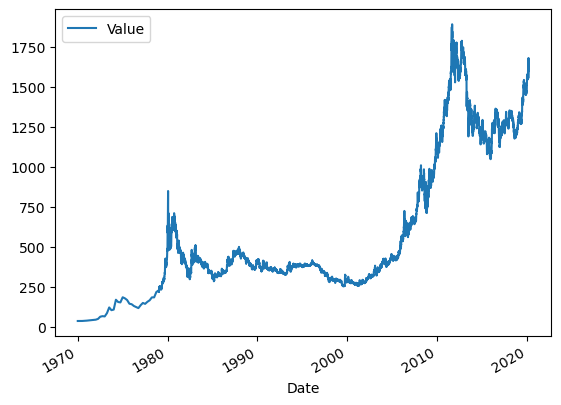

In [145]:
gold.plot()

<AxesSubplot:xlabel='Date'>

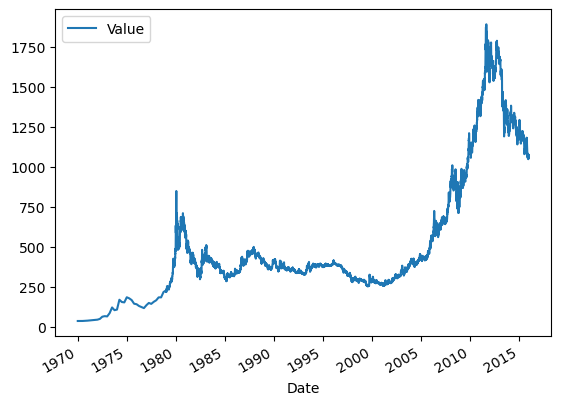

In [140]:
y_hist_df.plot()